In [106]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import arange
from numpy import linalg

In [107]:
class1 = pd.read_csv("Class1.txt", header=None, delimiter=" ")
class2 = pd.read_csv("Class2.txt", header=None, delimiter=" ")
class3 = pd.read_csv("Class3.txt", header=None, delimiter=" ")

In [108]:
def split(cl):
    m, n = cl.shape
    l1 = int(0.7*m)
    l2 = l1 + int(0.3*m)
    train_data = cl.iloc[:l1]
    test_data = cl.iloc[l1:m]
    
    return train_data, test_data

In [109]:
def plotplots(class1, class2, class3):
    plt.scatter(class1[0], class1[1])
    plt.scatter(class2[0], class2[1])
    plt.scatter(class3[0], class3[1])
    plt.legend(['Class 1','Class 2','Class 3'])
    plt.title("Datapoints of different classes")
    plt.show()

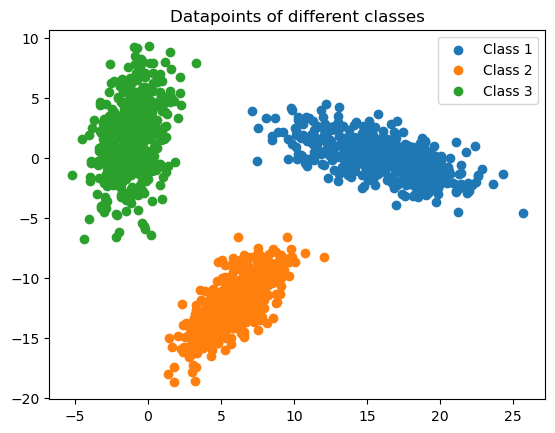

In [110]:
plotplots(class1, class2, class3)

train1, test1 = split(class1)
train2, test2 = split(class2)
train3, test3 = split(class3)

In [111]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

In [112]:
def add_label(x1,x2):
    x3=x1.append(x2,ignore_index=True)
    m , n =x3.shape
    y=[]
    for i in range(m):
        if i<len(x1):
            y.append(0)
        else:
            y.append(1)
    return x3,y
    

In [113]:
def training(x,y):
    m, n = x.shape
    w = np.array([0.2,0.1, 0.3])
    err = []
    avg_err = []
    epochs = 100
    for epochs in range(epochs):
        for i in range(m):
            xi = [1, x.iloc[i, 0], x.iloc[i, 1]]
            a = np.dot(w.T, xi)
            s=sigmoid(a)
            
            error = 0.5*(y[i]-s)**2
            lr = 0.25
            err.append(error)

            del_not = lr*(y[i]-s)*s*(1-s)
            del_w = np.dot(del_not, xi)
            w = w + del_w    #error updation
        error_avg = sum(err)/len(err)
        avg_err.append(error_avg)
        
    print("new weight: ", w)
    print("Average Error: ", round(error_avg, 5))
    
    return w, avg_err

In [114]:
class1v2Tr,y1= add_label(train1,train2)
w12, avg_err12 = training(class1v2Tr, y1)


C:\Users\Ankit Mehra\AppData\Local\Temp\ipykernel_19344\4118776239.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x3=x1.append(x2,ignore_index=True)


new weight:  [ 0.20945202 -0.57835742 -1.34864006]
Average Error:  4e-05


In [115]:
class1v3Tr ,y2= add_label(train1,train3)
w13, avg_err13 = training(class1v3Tr, y2)

C:\Users\Ankit Mehra\AppData\Local\Temp\ipykernel_19344\4118776239.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x3=x1.append(x2,ignore_index=True)


new weight:  [ 4.67395939 -1.13638446  0.2451723 ]
Average Error:  0.00019


In [116]:
class2v3Tr ,y3= add_label(train2,train3)
w23, avg_err23 = training(class2v3Tr, y3)

C:\Users\Ankit Mehra\AppData\Local\Temp\ipykernel_19344\4118776239.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x3=x1.append(x2,ignore_index=True)


new weight:  [ 4.8242447  -1.15589487  0.3987679 ]
Average Error:  0.0002


In [117]:
def classifier(xn, w):
    
    m, n = xn.shape
    yp = []
    
    for i in range(m):
        xi = [1, xn.iloc[i, 0], xn.iloc[i, 1]]
        an = np.dot(w.T, xi)
        yi = sigmoid(an)
        yp.append(yi)

    return yp

In [118]:
def decision_boundary(all_points, data, w, name):
    
    c1x_, c2x_, c1y_, c2y_ = [], [], [], []
    c1, c2 = [], []
    
    yp = classifier(all_points, w)
    m, n = all_points.shape
    for i in range(m):
        if yp[i] < 0.5:
            c1x_.append(all_points.iloc[i, 0])
            c1y_.append(all_points.iloc[i, 1])
            c1.append((all_points.iloc[i, 0],all_points.iloc[i, 1]))
        else:
            c2x_.append(all_points.iloc[i, 0])
            c2y_.append(all_points.iloc[i, 1])
            c2.append((all_points.iloc[i, 0],all_points.iloc[i, 1]))

    plt.scatter(c1x_, c1y_, marker='s', s=500)
    plt.scatter(c2x_, c2y_, marker='s', s=500)
    plt.legend(['Class '+name[0],'Class '+name[1]])
    plt.scatter(data.iloc[:,:1], data.iloc[:,1:2], edgecolors='black')

    plt.title("Decision Boundary (Class"+name[0]+name[1]+")")
    plt.tight_layout()
    plt.show()
    
    return [c1, c2]

In [119]:
max_x_val = int(max([max(class1.iloc[0]), max(class2.iloc[0]), max(class3.iloc[0])]))
min_x_val = int(min([min(class1.iloc[0]), min(class2.iloc[0]), min(class3.iloc[0])]))
max_y_val = int(max([max(class1.iloc[1]), max(class2.iloc[1]), max(class3.iloc[1])]))
min_y_val = int(min([min(class1.iloc[1]), min(class2.iloc[1]), min(class3.iloc[1])]))

In [120]:
all_points = []
for i in range(min_x_val, max_x_val+20):
    for j in range(min_y_val-10, max_y_val+5):
        all_points.append([i, j])
        

all_points = pd.DataFrame(all_points)     
#all_points

C:\Users\Ankit Mehra\AppData\Local\Temp\ipykernel_19344\4118776239.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x3=x1.append(x2,ignore_index=True)


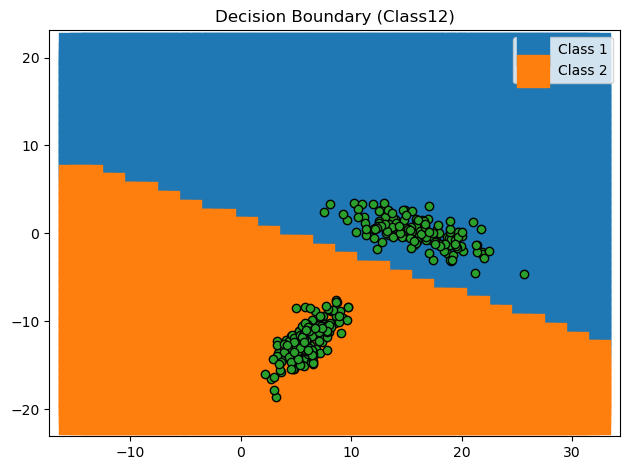

In [121]:
class1v2T ,y1=add_label(test1,test2)
b12 = decision_boundary(all_points, class1v2T, w12, ['1', '2'])

C:\Users\Ankit Mehra\AppData\Local\Temp\ipykernel_19344\4118776239.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x3=x1.append(x2,ignore_index=True)


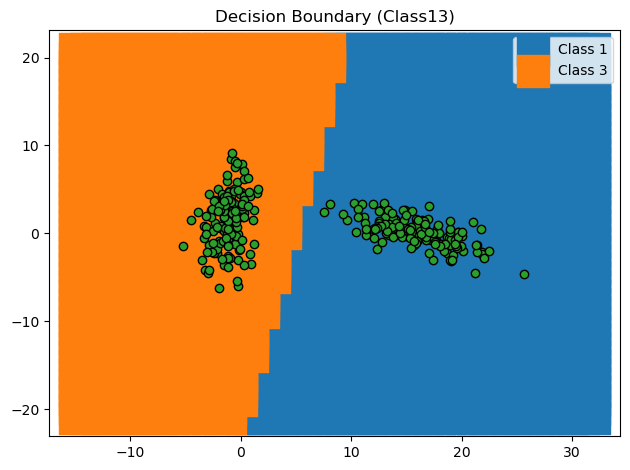

In [122]:
class1v3T ,y2=add_label(test1,test3)
b13 = decision_boundary(all_points, class1v3T, w13, ['1', '3'])

C:\Users\Ankit Mehra\AppData\Local\Temp\ipykernel_19344\4118776239.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x3=x1.append(x2,ignore_index=True)


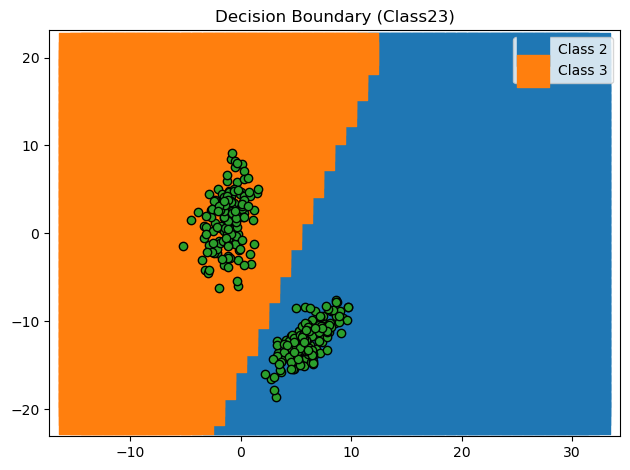

In [123]:
class2v3T ,y3=add_label(test2,test3)
b23 = decision_boundary(all_points, class2v3T, w23, ['2', '3'])

In [124]:
b1 = list(set.intersection(set(b12[0]), set(b13[0])))
b2 = list(set.intersection(set(b12[1]), set(b23[0])))
b3 = list(set.intersection(set(b13[1]), set(b23[1])))

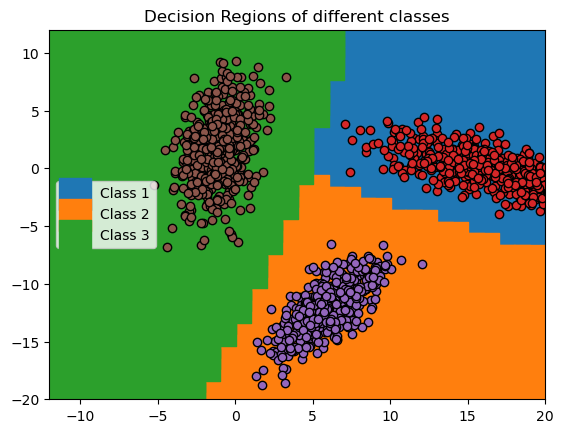

In [125]:
b1x, b1y = [i[0] for i in b1], [i[1] for i in b1]
b2x, b2y = [i[0] for i in b2], [i[1] for i in b2]
b3x, b3y = [i[0] for i in b3], [i[1] for i in b3]

plt.scatter(b1x, b1y, marker='s', s=500)
plt.scatter(b2x, b2y, marker='s', s=500)
plt.scatter(b3x, b3y, marker='s', s=500)


plt.scatter(class1[0], class1[1], edgecolors='black')
plt.scatter(class2[0], class2[1], edgecolors='black')
plt.scatter(class3[0], class3[1], edgecolors='black')
plt.legend(['Class 1','Class 2','Class 3'])
plt.title("Decision Regions of different classes")
plt.xlim(-12, 20)
plt.ylim(-20, 12)
plt.show()

Results

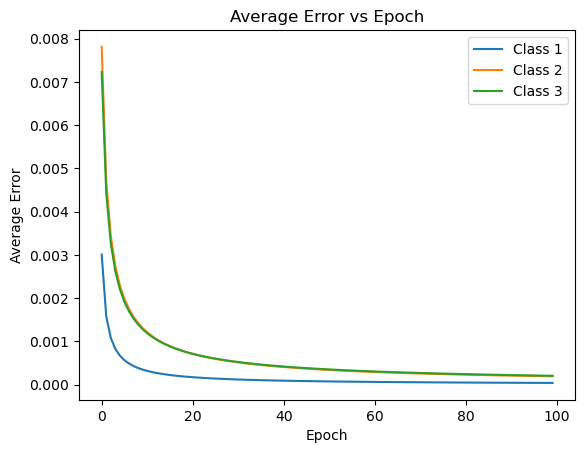

In [126]:
plt.plot(avg_err12)
plt.plot(avg_err13)
plt.plot(avg_err23)
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()

COnfusion matrix calculation

In [127]:
def confusion_matrix(predicted, k):
    matrix = 0
    predicted = convert_labels(predicted)
    c1, c2 = 0, 0
    for i in range(len(predicted)):
        if i<k and predicted[i] == 0:
            c1 += 1
        elif i<k and predicted[i] == 1:
            c2 += 1
    print("c1",c1,"c2",c2,"k",k)       
    return [[c1, k-c1], [c2, k-c2]]

In [128]:
def convert_labels(x):
    prediction = []
    for val in x:
        if val<0.5:
            prediction.append(0)
        else:
            prediction.append(1)

    return np.array(prediction)

In [129]:
pred12 = classifier(class1v2Tr, w12)
matrix12 = confusion_matrix(pred12, len(test1))
matrix12

c1 150 c2 0 k 150


[[150, 0], [0, 150]]

In [130]:
pred13 = classifier(class1v3Tr, w13)
matrix13 = confusion_matrix(pred13, len(test1))
matrix13

c1 150 c2 0 k 150


[[150, 0], [0, 150]]

In [131]:
pred23 = classifier(class2v3Tr, w23)
matrix23 = confusion_matrix(pred23, len(test2))
matrix23

c1 150 c2 0 k 150


[[150, 0], [0, 150]]

In [132]:
c11 = matrix12[0][0]+matrix13[0][0]
c12 = matrix12[0][1]
c13 = matrix13[0][1]

c21 = matrix12[1][0]
c22 = matrix12[1][1]+matrix23[0][0]
c23 = matrix23[0][1]

c31 = matrix13[1][0]
c32 = matrix23[1][0]
c33 = matrix13[1][1]+matrix23[1][1]

confusionmatrix = [[c11, c12, c13], [c21, c22, c23], [c31, c32, c33]]
print("Confusion Matrix")
print(np.array(confusionmatrix))

Confusion Matrix
[[300   0   0]
 [  0 300   0]
 [  0   0 300]]


Accuracy

In [133]:
accuracy = (c11+c22+c33)/(2*(len(test1)+len(test2)+len(test3)))*100
print('Accuracy = {}%'.format(accuracy))

Accuracy = 100.0%


Precision = TP/(TP+FP)

In [134]:
precision_1 =(c11)/((c11)+(c21+c31))
precision_2 =(c22)/((c22)+(c12+c32))
precision_3 =(c33)/((c33)+(c13+c23))
print("Precision1 -",precision_1,'\n',"Precision2 -",precision_2,'\n',"Precision3 -",precision_3)

Precision1 - 1.0 
 Precision2 - 1.0 
 Precision3 - 1.0
